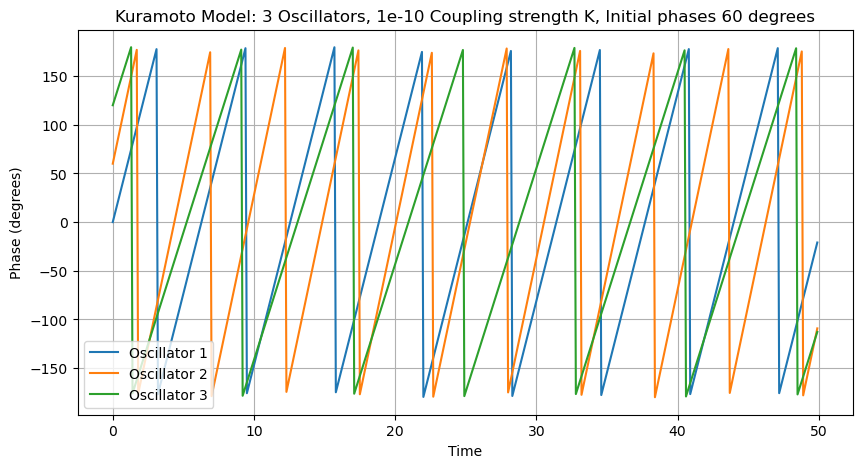

Kuramoto simulation completed and data saved to a CSV file.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Differential equation of Kuramoto-model (computes the rate of change of state variables theta[i]).
def kuramoto(theta, t, K, omega, adjacency_matrix):
    N = len(theta)
    dtheta_dt = np.zeros(N)
    for i in range(N):
        coupling_sum = 0.0
        for j in range(N):
            coupling_sum += adjacency_matrix[i, j] * np.sin(theta[j] - theta[i])
        dtheta_dt[i] = omega[i] + (K / N) * coupling_sum
    return dtheta_dt

# Parameters
N = 3  # Number of oscillators
K = 1.0e-10 # The coupling strength
omega = np.array([1.0, 1.2, 0.8])  # Natural frequencies of oscillators.
theta0 = np.radians([0, 60, 120]) # Initial phases of oscillators.

# Adjacency matrix that denotes, which oscillators are connected. Since there are three oscillators, each oscillator
# is connected to the other two.
adjacency_matrix = np.array([
    [0, 1, 1], 
    [1, 0, 1], 
    [1, 1, 0]
])

# Setting the time
T = 50   # Total time
dt = 0.1  # Time interval (sampling interval)
t = np.arange(0, T, dt)

# Solve Kuramoto-model (a system of differential equations).
solution = odeint(kuramoto, theta0, t, args=(K, omega, adjacency_matrix))

# Change the range of angles to [−π,π) to make visualization cleaner by keeping all phases in one rotation.
# np.mod()-function always returns a non-negative number.
solution = np.mod(solution + np.pi, 2*np.pi) - np.pi

# Plot the evolution of the oscillators' phases over time.
plt.figure(figsize=(10, 5))
for i in range(N):
    plt.plot(t, np.degrees(solution[:, i]), label=f'Oscillator {i+1}')

plt.xlabel("Time")
plt.ylabel("Phase (degrees)")
plt.title(f"Kuramoto Model: {N} Oscillators, {K} Coupling strength K, Initial phases 60 degrees")
plt.legend()
plt.grid()
plt.show()

# Save the time series data.
kuramoto_data = {
    "time": t,
    "oscillator_1": np.degrees(solution[:, 0]),
    "oscillator_2": np.degrees(solution[:, 1]),
    "oscillator_3": np.degrees(solution[:, 2])
}

df = pd.DataFrame(kuramoto_data)
df.to_csv("kuramoto_simulation.csv", index=False)  # Save as CSV-file.
print("Kuramoto simulation completed and data saved to a CSV file.")
